In [63]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load the dataset into a pandas DataFrame
df = pd.read_csv("D:/Data/Spring23/AppliedML-JP/ML Project Dataset/accident.CSV", encoding='latin1')


##  About the Dataset
The dataset provides detailed information about traffic accidents, including the state and county where the accidents occurred, the number of vehicles and pedestrians involved, the total number of individuals affected, and various temporal attributes such as the day, month, year, hour, and minute of the accidents. It also includes additional details such as the city name, road characteristics (e.g., route type, rural/urban classification), ownership of the road, location coordinates, special jurisdictions,factors contributing to the accidents (e.g., weather conditions, intoxication), and various codes and names associated with different aspects of the accidents. The dataset offers a comprehensive view of traffic accidents, allowing for analysis and exploration of factors contributing to road incidents and their potential consequences, such as fatalities and incidents involving drunk drivers.

In [64]:
df.head()

,STATE,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,...,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,FATALS,DRUNK_DR
0,1,Alabama,10001,1,1,0,0,4,4,0,...,3,3:00am-3:59am,10,10,99,Unknown,99,Unknown EMS Hospital Arrival Time,3,1
1,1,Alabama,10002,4,4,0,0,6,6,0,...,17,5:00pm-5:59pm,26,26,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
2,1,Alabama,10003,2,2,0,0,2,2,0,...,15,3:00pm-3:59pm,15,15,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
3,1,Alabama,10004,1,1,0,0,5,5,0,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
4,1,Alabama,10005,1,1,0,0,1,1,0,...,0,0:00am-0:59am,55,55,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,0


In [65]:
df.shape

(35498, 81)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35498 entries, 0 to 35497
Data columns (total 81 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATE         35498 non-null  int64  
 1   STATENAME     35498 non-null  object 
 2   ST_CASE       35498 non-null  int64  
 3   VE_TOTAL      35498 non-null  int64  
 4   VE_FORMS      35498 non-null  int64  
 5   PVH_INVL      35498 non-null  int64  
 6   PEDS          35498 non-null  int64  
 7   PERSONS       35498 non-null  int64  
 8   PERMVIT       35498 non-null  int64  
 9   PERNOTMVIT    35498 non-null  int64  
 10  COUNTY        35498 non-null  int64  
 11  COUNTYNAME    35498 non-null  object 
 12  CITY          35498 non-null  int64  
 13  CITYNAME      35498 non-null  object 
 14  DAY           35498 non-null  int64  
 15  DAYNAME       35498 non-null  int64  
 16  MONTH         35498 non-null  int64  
 17  MONTHNAME     35498 non-null  object 
 18  YEAR          35498 non-nu

In [67]:
df.describe()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,COUNTY,...,WEATHER,SCH_BUS,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,FATALS,DRUNK_DR
count,35498.000000,35498.000000,35498.000000,35498.000000,35498.000000,35498.000000,35498.000000,35498.000000,35498.000000,35498.000000,...,35498.000000,35498.000000,35498.000000,35498.000000,35498.000000,35498.000000,35498.000000,35498.000000,35498.000000,35498.000000
mean,27.198518,272790.481717,1.561778,1.518874,0.042904,0.228266,2.175221,2.165023,0.238464,93.150487,...,9.549806,0.001437,61.319455,68.391628,61.810919,68.679278,77.509240,80.695053,1.085639,0.267114
std,16.364762,163537.955553,0.783004,0.737210,0.293685,0.470721,1.593983,1.589622,0.494338,98.393403,...,25.260343,0.037877,42.618626,36.201912,42.556191,36.152140,32.787189,27.605809,0.342650,0.460186
min,1.000000,10001.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,12.000000,122092.250000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,31.000000,...,1.000000,0.000000,16.000000,34.000000,16.000000,34.000000,88.000000,88.000000,1.000000,0.000000
50%,26.000000,260931.500000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,71.000000,...,1.000000,0.000000,99.000000,98.000000,99.000000,98.000000,88.000000,88.000000,1.000000,0.000000
75%,42.000000,420535.750000,2.000000,2.000000,0.000000,0.000000,3.000000,3.000000,0.000000,117.000000,...,2.000000,0.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,1.000000,1.000000
max,56.000000,560115.000000,15.000000,15.000000,10.000000,8.000000,61.000000,61.000000,9.000000,830.000000,...,99.000000,1.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,8.000000,4.000000


In [68]:
df_world = df.groupby(["STATENAME"])[["FATALS"]].sum().reset_index()
df_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   STATENAME  51 non-null     object
 1   FATALS     51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 944.0+ bytes


In [69]:
print(df.isnull().sum())

STATE          0
STATENAME      0
ST_CASE        0
VE_TOTAL       0
VE_FORMS       0
              ..
HOSP_HRNAME    0
HOSP_MN        0
HOSP_MNNAME    0
FATALS         0
DRUNK_DR       0
Length: 81, dtype: int64


# Creating a horizontal histogram using the state_counts data

This code snippet performs data aggregation and visualization to summarize the number of accidents by state. 
This code provides a clear visualization of the number of accidents per state, with each state represented by a 
horizontal bar whose length indicates the corresponding count of accidents. It allows for easy comparison and identification 
of states with higher or lower accident rates.

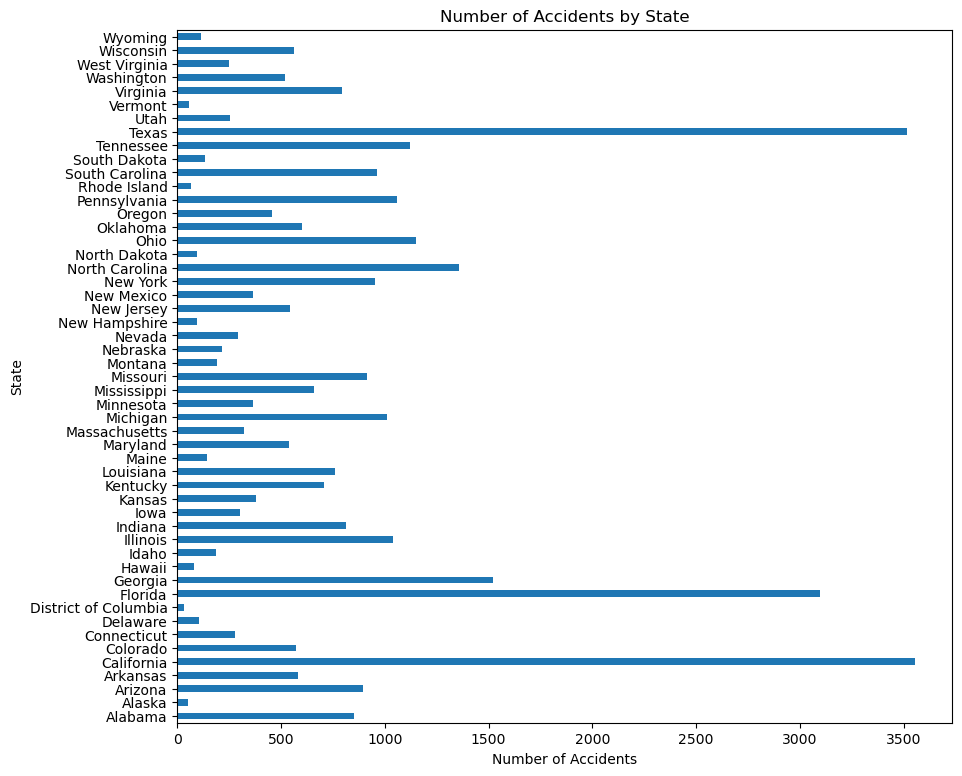

In [74]:
state_counts = df.groupby('STATENAME')['FATALS'].count()
fig, ax = plt.subplots(figsize=(10, 9))
state_counts.plot(kind='barh', ax=ax)

# set the title and axis labels
ax.set_title('Number of Accidents by State')
ax.set_xlabel('Number of Accidents')
ax.set_ylabel('State')

plt.show()

# Creating a histogram using the Fatal column

The provided code uses the seaborn library to create a histogram plot of the 'FATALS' column from the dataframe. 
The histogram represents the distribution of the number of fatalities in the dataset. The parameter kde=True adds a 
kernel density estimation line to the plot, providing an estimation of the underlying probability density function. 
The bins=25 argument specifies the number of bins used to group the data.

The resulting plot provides an overview of the distribution of fatalities in the dataset, showing the frequency of different 
numbers of fatalities. The x-axis represents the number of fatalities, while the y-axis indicates the count or frequency of 
occurrences. The kernel density estimation line gives an indication of the shape of the underlying distribution. The title 
of the plot is set as "Number of Fatals", and the x-axis label is set as "Fatals". This visualization helps to understand the 
distribution and concentration of fatal incidents in the dataset.

Text(0.5, 0, 'Fatals')

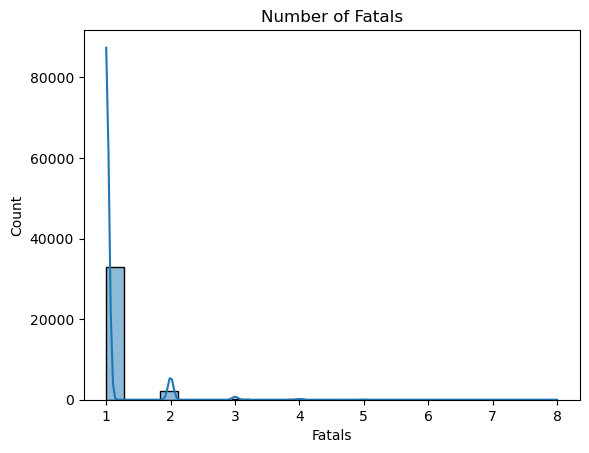

In [5]:
sns.histplot(data=df['FATALS'], kde=True, bins=25)
plt.title('Number of Fatals')
plt.xlabel('Fatals')

# Creating a histogram using the Month column


Text(0.5, 0, 'Month')

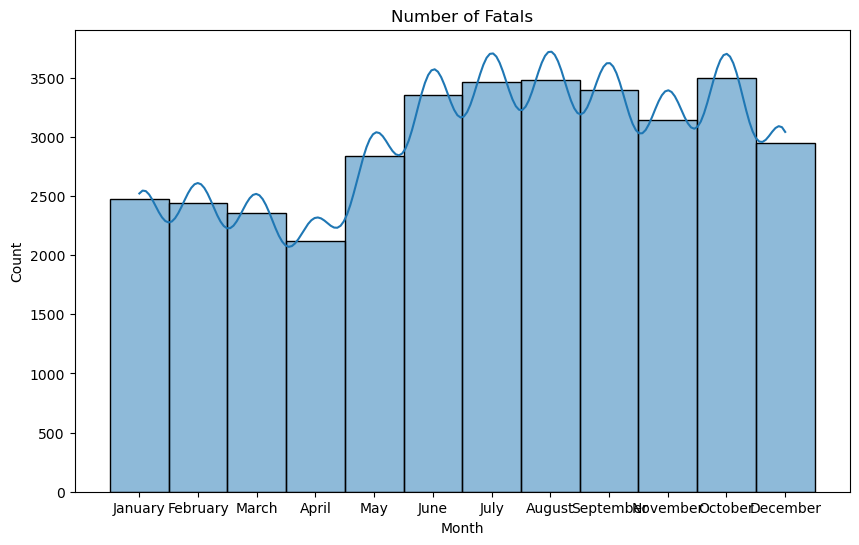

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MONTHNAME', kde=True, bins=25)
plt.title('Number of Fatals')
plt.xlabel('Month')


Overall, this code generates a histogram with a kernel density estimation overlay to visualize the distribution of 
fatalities across different months. The histogram provides insights into the frequency and concentration of fatalities 
in each month, while the KDE plot offers a smoothed representation of the distribution pattern.

# Creating a histogram to understand where most accidents took place.


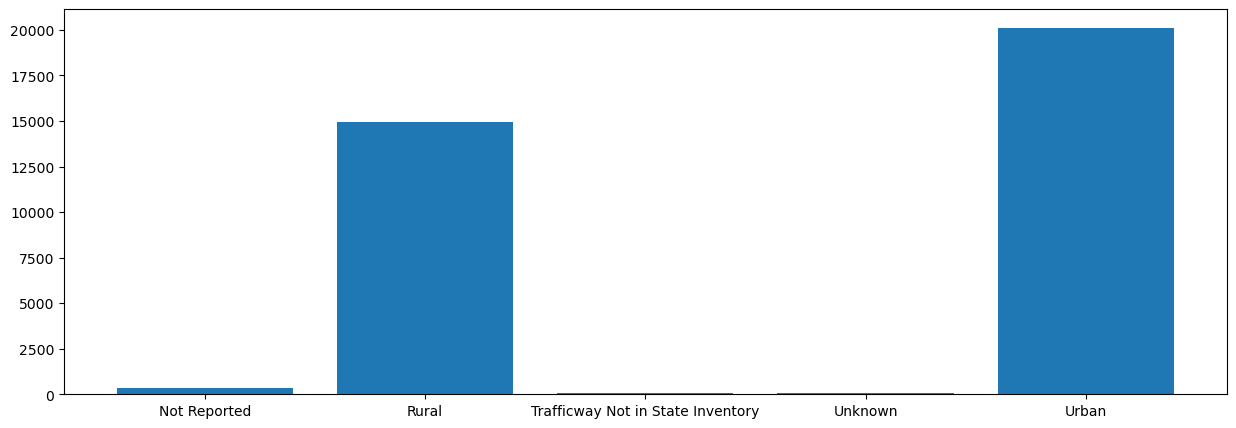

In [7]:
rural_urban = df.groupby('RUR_URBNAME').size()
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(rural_urban.index, rural_urban.values)

plt.show()

this plot helps visualize the distribution of occurrences across different categories of the 
'RUR_URBNAME' column using a bar plot, providing insights into the frequency of rural and urban accidents or incidents.

In [8]:
df.describe()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,COUNTY,...,WEATHER,SCH_BUS,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,FATALS,DRUNK_DR
count,35498.000000,35498.000000,35498.000000,35498.000000,35498.000000,35498.000000,35498.000000,35498.000000,35498.000000,35498.000000,...,35498.000000,35498.000000,35498.000000,35498.000000,35498.000000,35498.000000,35498.000000,35498.000000,35498.000000,35498.000000
mean,27.198518,272790.481717,1.561778,1.518874,0.042904,0.228266,2.175221,2.165023,0.238464,93.150487,...,9.549806,0.001437,61.319455,68.391628,61.810919,68.679278,77.509240,80.695053,1.085639,0.267114
std,16.364762,163537.955553,0.783004,0.737210,0.293685,0.470721,1.593983,1.589622,0.494338,98.393403,...,25.260343,0.037877,42.618626,36.201912,42.556191,36.152140,32.787189,27.605809,0.342650,0.460186
min,1.000000,10001.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,12.000000,122092.250000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,31.000000,...,1.000000,0.000000,16.000000,34.000000,16.000000,34.000000,88.000000,88.000000,1.000000,0.000000
50%,26.000000,260931.500000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,71.000000,...,1.000000,0.000000,99.000000,98.000000,99.000000,98.000000,88.000000,88.000000,1.000000,0.000000
75%,42.000000,420535.750000,2.000000,2.000000,0.000000,0.000000,3.000000,3.000000,0.000000,117.000000,...,2.000000,0.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,1.000000,1.000000
max,56.000000,560115.000000,15.000000,15.000000,10.000000,8.000000,61.000000,61.000000,9.000000,830.000000,...,99.000000,1.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,8.000000,4.000000


<AxesSubplot:xlabel='LONGITUD', ylabel='LATITUDE'>

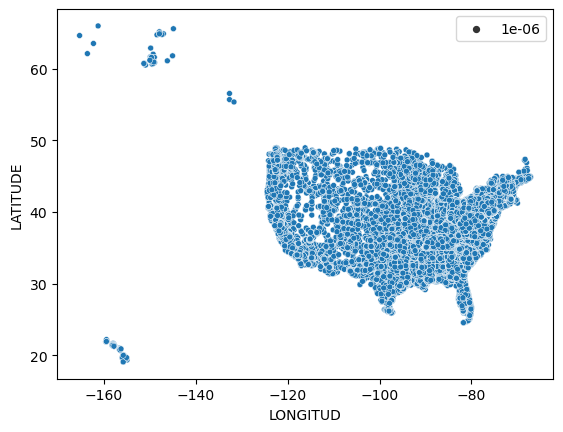

In [9]:
sns.scatterplot(x=df.LONGITUD, y=df.LATITUDE, size=0.000001)

I have created scatter plot using the seaborn library's scatterplot function. The x and y arguments specify the data to 
be plotted on the x and y axes, respectively. In this case, the longitude (LONGITUD) is plotted on the x-axis and the 
latitude (LATITUDE) is plotted on the y-axis.The size argument sets the size of the markers on the plot. In this case, 
the size is set to 0.000001, which is a very small size, likely used to reduce the clutter of the plot.
Overall, this code creates a simple scatter plot of longitude and latitude coordinates, which could be useful for visualizing geographical data or identifying spatial patterns in the data.

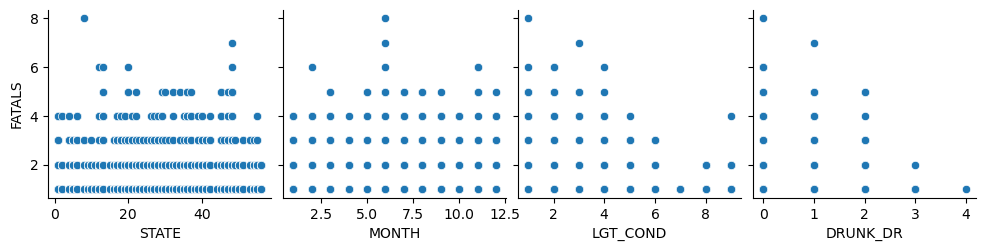

In [75]:
sns.pairplot(data=df, y_vars=['FATALS'], x_vars=['STATE','MONTH', 'LGT_COND','DRUNK_DR'])
plt.show()

In [11]:
correlations = df.corr()['FATALS'].drop('FATALS')
print(correlations.sort_values(ascending=False))

PERMVIT         0.284119
PERSONS         0.283857
VE_FORMS        0.131890
VE_TOTAL        0.130012
MAN_COLL        0.050360
DRUNK_DR        0.048591
PVH_INVL        0.015557
COUNTY          0.010396
WRK_ZONE        0.005687
DAY_WEEK        0.004955
DAY             0.003114
DAYNAME         0.003114
RELJCT1         0.002560
HOSP_MN         0.001960
MONTH           0.001907
NHS             0.001084
HARM_EV         0.000447
STATE          -0.000319
ST_CASE        -0.000325
HOSP_HR        -0.000544
SP_JUR         -0.001628
MILEPT         -0.002577
SCH_BUS        -0.002968
TYP_INT        -0.003036
LATITUDE       -0.004317
LATITUDENAME   -0.004317
MINUTE         -0.004351
NOT_MIN        -0.005381
RELJCT2        -0.005831
NOT_HOUR       -0.006924
ARR_MIN        -0.007468
WEATHER        -0.008727
ARR_HOUR       -0.008775
LONGITUDNAME   -0.011793
LONGITUD       -0.011793
RD_OWNER       -0.012257
REL_ROAD       -0.013033
LGT_COND       -0.013268
HOUR           -0.014331
CITY           -0.014341


This code give the correlations between the 'FATALS' column and all other columns in the DataFrame. We can see that the below columns has high correlation
PERMVIT         0.284119
PERSONS         0.283857
VE_FORMS        0.131890
VE_TOTAL        0.130012
MAN_COLL        0.050360
DRUNK_DR        0.048591
PVH_INVL        0.015557

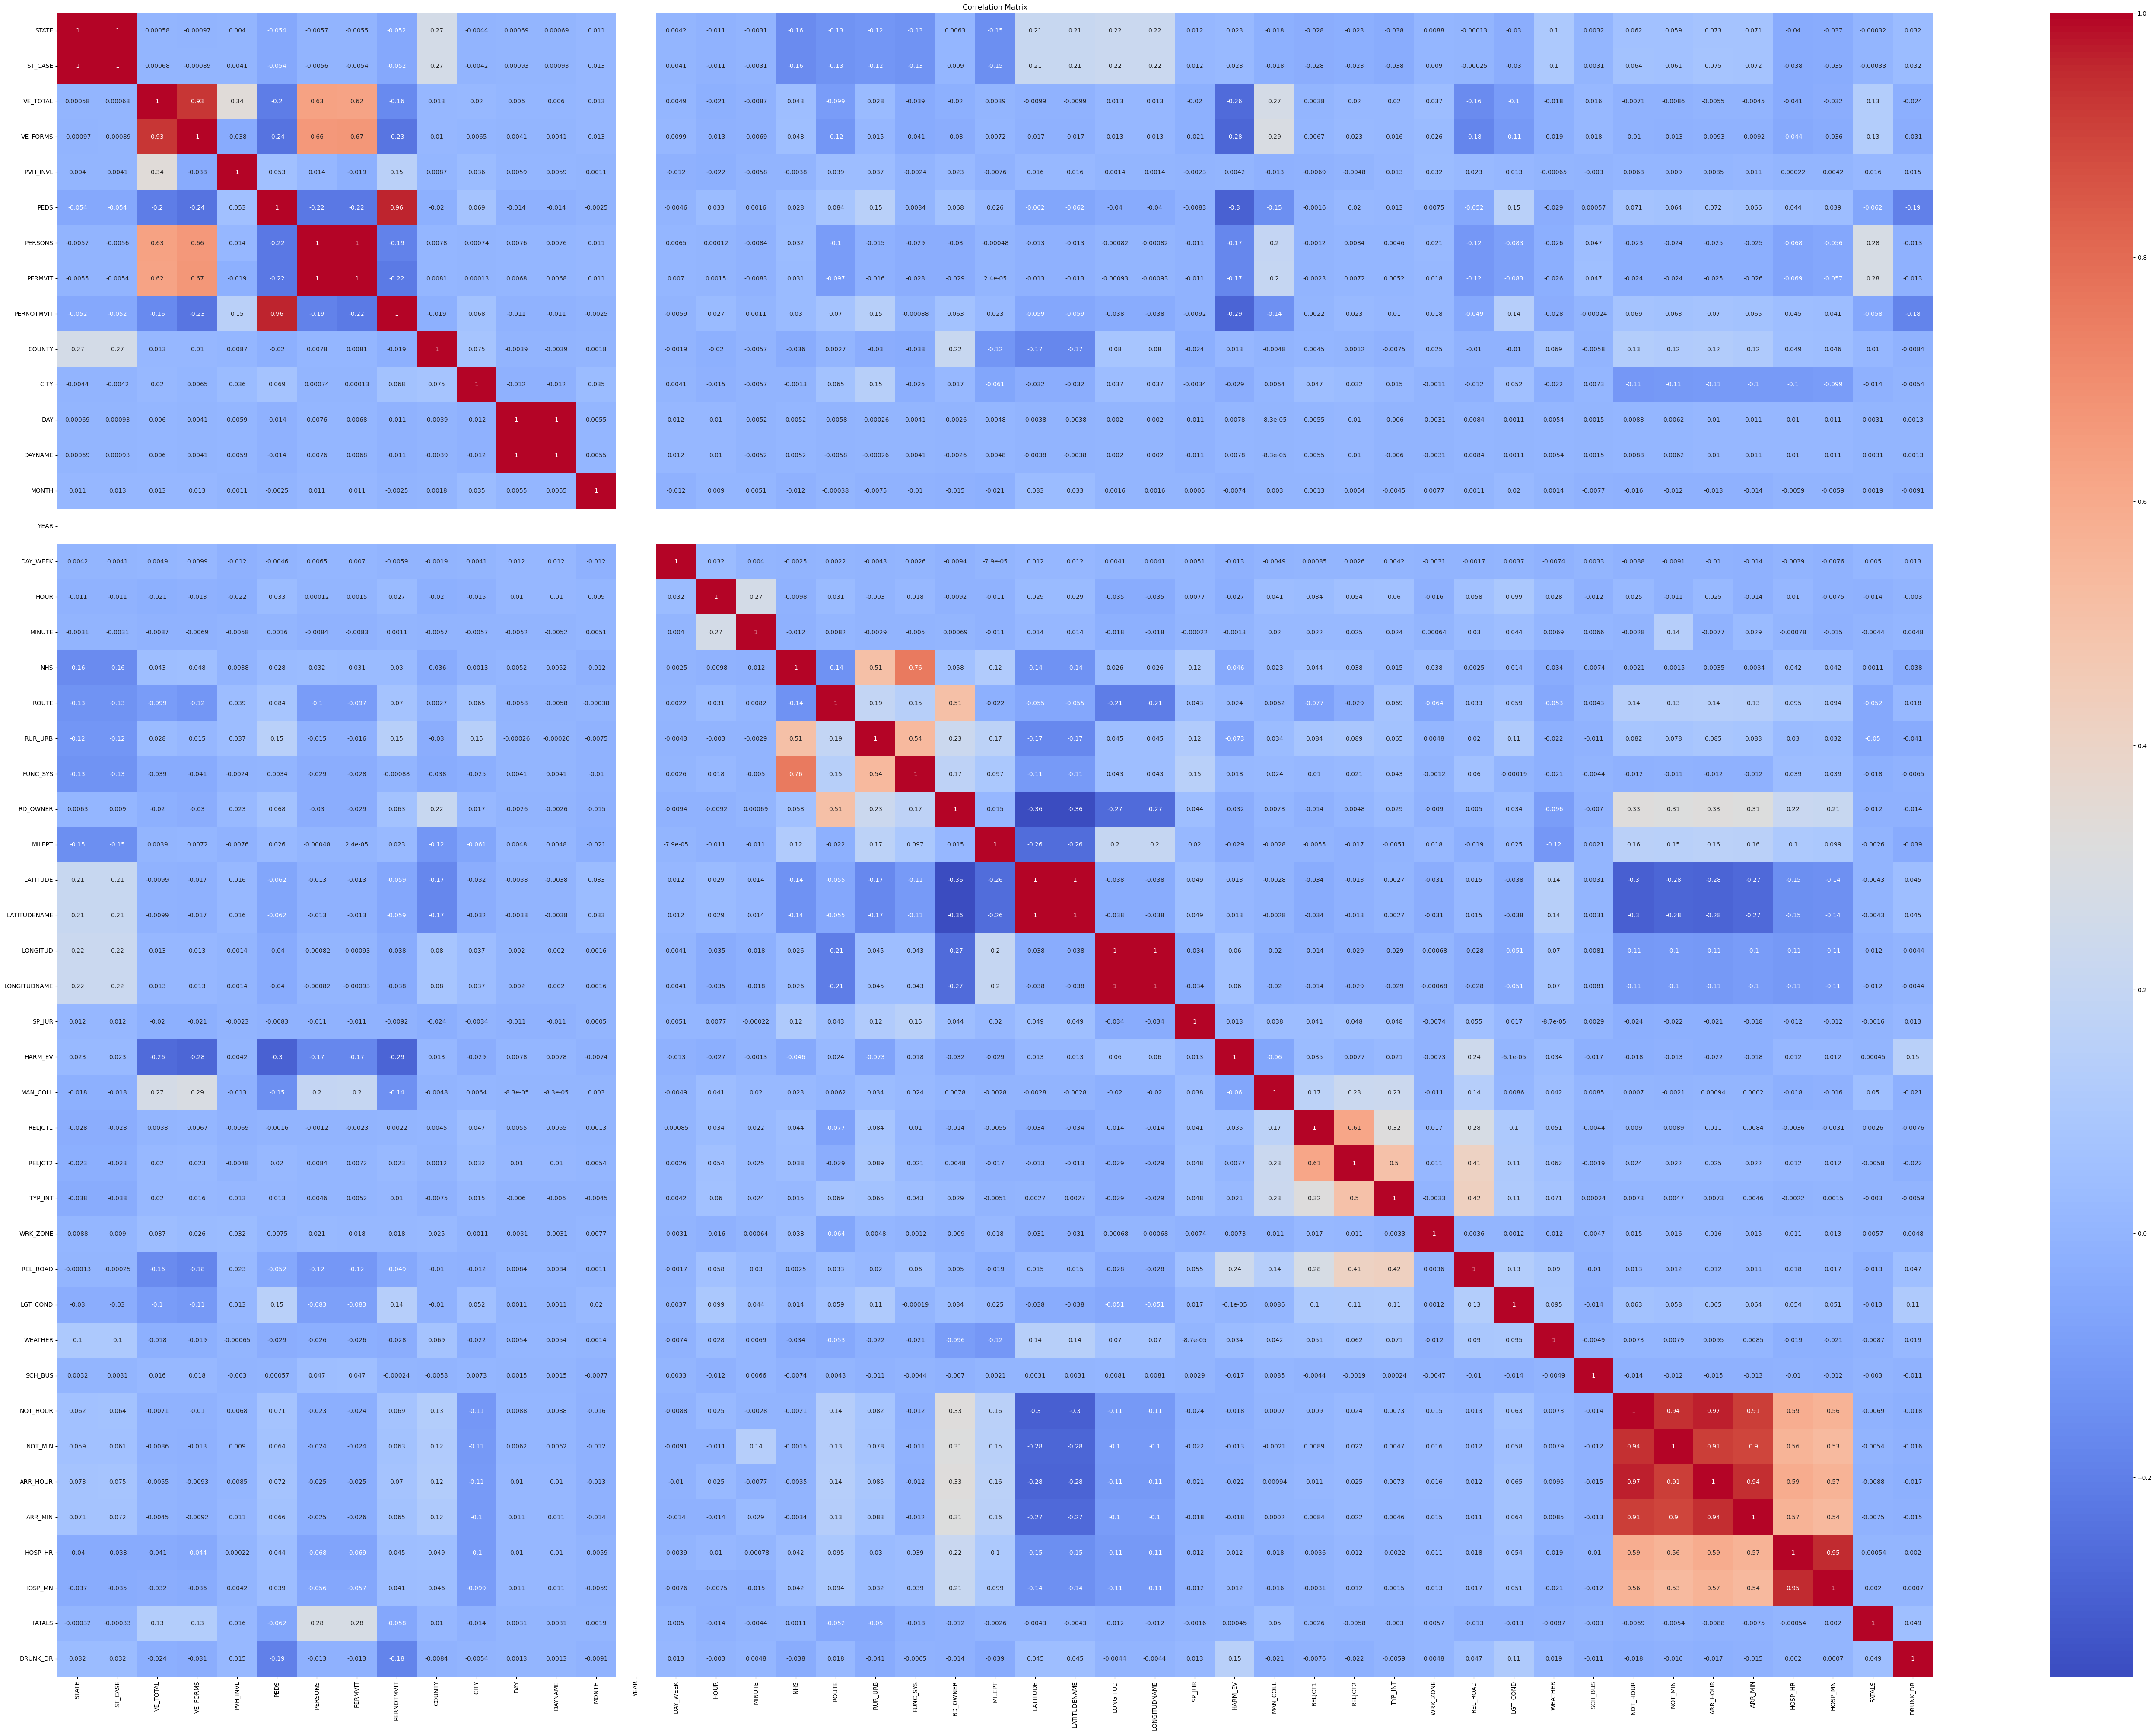

In [12]:
correlation_matrix = df.corr()
plt.figure(figsize=(70, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Plot the correlation matrix

Trying to find other correlations columns

In [13]:
correlation_threshold = 0.5

# Find the highly correlated features
highly_correlated = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated.append((colname_i, colname_j))

# Remove highly correlated features
selected_features = list(df.columns)
for feature_pair in highly_correlated:
    if feature_pair[0] in selected_features:
        selected_features.remove(feature_pair[0])
    if feature_pair[1] in selected_features:
        selected_features.remove(feature_pair[1])
print("Selected Features:")
print(selected_features)

Selected Features:
['STATENAME', 'PVH_INVL', 'COUNTY', 'COUNTYNAME', 'CITY', 'CITYNAME', 'MONTH', 'MONTHNAME', 'YEAR', 'DAY_WEEK', 'DAY_WEEKNAME', 'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME', 'NHSNAME', 'ROUTENAME', 'TWAY_ID', 'TWAY_ID2', 'RUR_URBNAME', 'FUNC_SYSNAME', 'RD_OWNERNAME', 'MILEPT', 'MILEPTNAME', 'SP_JUR', 'SP_JURNAME', 'HARM_EV', 'HARM_EVNAME', 'MAN_COLL', 'MAN_COLLNAME', 'RELJCT1NAME', 'RELJCT2NAME', 'TYP_INTNAME', 'WRK_ZONE', 'WRK_ZONENAME', 'REL_ROAD', 'REL_ROADNAME', 'LGT_COND', 'LGT_CONDNAME', 'WEATHER', 'WEATHERNAME', 'SCH_BUS', 'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOURNAME', 'NOT_MINNAME', 'ARR_HOURNAME', 'ARR_MINNAME', 'HOSP_HRNAME', 'HOSP_MNNAME', 'FATALS', 'DRUNK_DR']


# Encoding the categorical columns

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("D:/Data/Spring23/AppliedML-JP/ML Project Dataset/accident.CSV", encoding='latin1')
categorical_cols = ['STATENAME', 'PVH_INVL', 'COUNTY', 'COUNTYNAME', 'CITY', 'CITYNAME', 'MONTH', 'MONTHNAME', 'YEAR', 'DAY_WEEK', 'DAY_WEEKNAME', 'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME', 'NHSNAME', 'ROUTENAME', 'TWAY_ID', 'TWAY_ID2', 'RUR_URBNAME', 'FUNC_SYSNAME', 'RD_OWNERNAME', 'MILEPT', 'MILEPTNAME', 'LATITUDENAME', 'LONGITUDNAME', 'SP_JUR', 'SP_JURNAME', 'HARM_EV', 'HARM_EVNAME', 'MAN_COLL', 'MAN_COLLNAME', 'RELJCT1NAME', 'RELJCT2NAME', 'TYP_INTNAME', 'WRK_ZONE', 'WRK_ZONENAME', 'REL_ROADNAME', 'LGT_COND', 'LGT_CONDNAME', 'WEATHER', 'WEATHERNAME', 'SCH_BUS', 'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOURNAME', 'NOT_MINNAME', 'ARR_HOURNAME', 'ARR_MINNAME', 'HOSP_HRNAME', 'HOSP_MNNAME', 'FATALS', 'DRUNK_DR']
# Apply label encoding to categorical columns
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Print the encoded dataset
print(df.head())

   STATE  STATENAME  ST_CASE  VE_TOTAL  VE_FORMS  PVH_INVL  PEDS  PERSONS  \
0      1          0    10001         1         1         0     0        4   
1      1          0    10002         4         4         0     0        6   
2      1          0    10003         2         2         0     0        2   
3      1          0    10004         1         1         0     0        5   
4      1          0    10005         1         1         0     0        1   

   PERMVIT  PERNOTMVIT  ...  ARR_HOUR  ARR_HOURNAME  ARR_MIN  ARR_MINNAME  \
0        4           0  ...         3            10       10            2   
1        6           0  ...        17            15       26           19   
2        2           0  ...        15            11       15            7   
3        5           0  ...        99            25       99           62   
4        1           0  ...         0             0       55           51   

   HOSP_HR  HOSP_HRNAME  HOSP_MN  HOSP_MNNAME  FATALS  DRUNK_DR  
0       

By applying label encoding to the categorical columns in the dataset, we convert the categorical data into numerical 
representations. This preprocessing step is commonly used in machine learning tasks, as many algorithms require numerical 
inputs. The encoded DataFrame 'df' can now be used for further analysis or model training.

In [15]:
selected_features = ['VE_TOTAL','VE_FORMS','PVH_INVL','PEDS','PERSONS','PERMVIT','PERNOTMVIT','COUNTY', 'DAY','MONTH','DAY_WEEK','NHS','ROUTE','RUR_URB', 'RD_OWNER', 'HARM_EV', 'MAN_COLL', 'RELJCT1','RELJCT2','TYP_INT', 'REL_ROAD','LGT_COND', 'WEATHER', 'DRUNK_DR']
print(selected_features)

['VE_TOTAL', 'VE_FORMS', 'PVH_INVL', 'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'COUNTY', 'DAY', 'MONTH', 'DAY_WEEK', 'NHS', 'ROUTE', 'RUR_URB', 'RD_OWNER', 'HARM_EV', 'MAN_COLL', 'RELJCT1', 'RELJCT2', 'TYP_INT', 'REL_ROAD', 'LGT_COND', 'WEATHER', 'DRUNK_DR']


In [19]:
selected_features2 = [ 'VE_TOTAL', 'PERSONS', 'PERMVIT', 'DAY_WEEK', 'RUR_URB', 'FUNC_SYS', 'RD_OWNER', 'HARM_EV', 'RELJCT2', 'REL_ROAD', 'FUNC_SYS', 'RD_OWNER', 'LGT_COND', 'WEATHER', 'DRUNK_DR']
selected_features3 = [ 'PERMVIT', 'PERSONS', 'VE_FORMS', 'VE_TOTAL', 'MAN_COLL']
features = [ 'PERMVIT', 'PERSONS', 'VE_FORMS', 'VE_TOTAL', 'MAN_COLL']

I have been selecting these specific features, it is likely that these variables have been identified as potentially influential or informative in predicting the outcome of interest (e.g., the number of fatalities). These features may have been determined indicating their relevance in predicting the target variable accurately. By focusing on these selected features, it is expected that a model trained using these attributes will yield higher accuracy compared to utilizing all the available features in the dataset.


# Linear Regression Model

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[features]
y = df['FATALS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 0.1171107480168401
R-squared (R2) Score: 0.09749534342813104


The above code performs a linear regression analysis using the selected features from the dataset (X) to predict the number 
of fatalities (y). It splits the data into training and testing sets, fits a Linear Regression model to the training data, 
makes predictions on the testing data, and evaluates the model using mean squared error (MSE) and R-squared (R2) score. 
The code provides insights into the performance of the linear regression model in predicting the number of fatalities based 
on the selected features.

Based on the obtained metrics, the mean squared error (MSE) of 0.117 and the R-squared (R2) score of 0.097 suggest that the 
linear regression model built using the selected features has limited predictive power for explaining the variation in the 
number of fatalities. The MSE value indicates that, on average, the predictions differ from the actual values by approximately 
0.117 squared units. The low R2 score of 0.097 indicates that only around 9.75% of the variance in the number of fatalities is 
explained by the selected features. These results suggest that the linear regression model may not be capturing the complex 
relationships between the features and the target variable, and alternative modeling approaches or additional relevant features 
may be required to improve the predictive performance.

# Classification: Logistic Regression

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error

#features = ['VE_TOTAL','VE_FORMS','PVH_INVL','PEDS','PERSONS','PERMVIT','PERNOTMVIT','COUNTY', 'DAY','MONTH','DAY_WEEK','NHS','ROUTE','RUR_URB', 'RD_OWNER', 'HARM_EV', 'MAN_COLL', 'RELJCT1','RELJCT2','TYP_INT', 'REL_ROAD','LGT_COND', 'WEATHER', 'DRUNK_DR']
features = [ 'PERMVIT', 'PERSONS', 'VE_FORMS', 'VE_TOTAL', 'MAN_COLL']
target = 'FATALS'

train_data, test_data, train_labels, test_labels = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
classifier = LogisticRegression(max_iter=1000)
classifier.fit(train_data, train_labels)
classification_predictions = classifier.predict(test_data)


classification_accuracy = accuracy_score(test_labels, classification_predictions)
print('Classification Accuracy:', classification_accuracy)

regressor = LinearRegression()
regressor.fit(train_data, train_labels)
regression_predictions = regressor.predict(test_data)

regression_mse = mean_squared_error(test_labels, regression_predictions)
print('Regression Mean Squared Error:', regression_mse)


Classification Accuracy: 0.9236619718309859
Regression Mean Squared Error: 0.1171107480168401


The above code performs classification and regression tasks using logistic regression and linear regression models, respectively.
It splits the dataset into training and testing sets, selects a subset of features for modeling, and evaluates the accuracy of 
the classification predictions and the mean squared error of the regression predictions.

The code achieves a classification accuracy of approximately 92.4%, indicating the effectiveness of the logistic regression model in predicting the target variable. Additionally, the regression mean squared error of around 0.117 suggests that the linear 
regression model provides a reasonably accurate approximation for predicting the target variable's numerical values.

In [22]:
from sklearn.feature_selection import RFE
selector = RFE(LinearRegression(), n_features_to_select=5, step=1)
selector = selector.fit(X, y)

The code snippet performs feature selection using Recursive Feature Elimination (RFE) with Linear Regression as the estimator. 
It selects the top 5 features from the input dataset 'X' based on their importance for predicting the target variable 'y'.

In [23]:
selector.support_

array([ True,  True,  True,  True,  True])

The output array indicates the selected features after performing Recursive Feature Elimination (RFE) with Linear Regression. 
The value 'True' for each feature index indicates that the corresponding feature has been selected as important for predicting 
the target variable. In this case, all five features have been identified as significant and retained for further analysis.

In [24]:
selector.ranking_

array([1, 1, 1, 1, 1])

In [ ]:
selected_features = ['VE_TOTAL', 'VE_FORMS', 'PVH_INVL', 'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'ROUTE', 'RUR_URB', 'FUNC_SYS', 'WEATHER', 'LGT_COND', 'DRUNK_DR', 'SCH_BUS', 'TYP_INT', 'HARM_EV']

# KNeighborsRegressor

In [25]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X,y)

KNeighborsRegressor(n_neighbors=2)

This code uses the scikit-learn library to create an instance of the KNeighborsRegressor class with a specified number of neighbors (2 in this case). It then fits the model to the training data X and y using the fit() method, which trains the model to make predictions based on the input data. The resulting model can then be used to make predictions on new, unseen data.

In [26]:
neigh.score(X,y)

-0.27985532102705335

The value "-0.27985532102705335" indicates the R-squared score of the model on the provided data.
The R-squared score measures the proportion of the variance in the target variable that can be explained by the model. A negative R-squared score suggests that the model's predictions are worse than simply using the mean of the target variable. 

In [27]:
models = [KNeighborsRegressor(n_neighbors=i) for i in range(1,10)]
[model.fit(X,y).score(X,y) for model in models]

[-0.7654997098082226,
 -0.27985532102705335,
 -0.08619475668216903,
 0.011915220849380237,
 0.041418597353595876,
 0.013608151168198912,
 0.02294769652821349,
 0.03641563834478645,
 0.05188792727482494]

The code snippet creates a list of K-nearest neighbors regression models, where each model has a different number of neighbors ranging from 1 to 9. For each model, it fits the model to the training data X and y, and then calculates and collects the R-squared score of each model on the same training data.

The code provided is creating a list of K-nearest neighbors regression models with different numbers of neighbors (ranging from 1 to 9), fitting each model to the data, and then calculating the R-squared score for each model on the same data.

The resulting list of R-squared scores is as follows:

For the model with 1 neighbor: -0.7654997098082226
For the model with 2 neighbors: -0.27985532102705335
For the model with 3 neighbors: -0.08619475668216903
For the model with 4 neighbors: 0.011915220849380237
For the model with 5 neighbors: 0.041418597353595876
For the model with 6 neighbors: 0.013608151168198912
For the model with 7 neighbors: 0.02294769652821349
For the model with 8 neighbors: 0.03641563834478645
For the model with 9 neighbors: 0.05188792727482494
The negative R-squared values suggest that the models with 1 and 2 neighbors perform worse than using the mean of the target variable for predictions. As the number of neighbors increases, the R-squared scores become positive, indicating a better fit of the models to the data. The highest R-squared score is achieved with 9 neighbors. However, it's important to note that evaluating models solely on the training data can lead to overfitting. It is recommended to assess the model's performance on unseen test data for a more reliable evaluation.


# DecisionTreeClassifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the decision tree classifier
clf = DecisionTreeClassifier()

# Train the decision tree classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9238028169014084


The above code implements a decision tree classifier on the dataset by splitting it into training and testing sets using the `train_test_split` method. Then, a `DecisionTreeClassifier` model is created and trained on the training set using the `fit` method. The trained model is then used to make predictions on the test set using the `predict` method, and the accuracy of the model is evaluated using the `accuracy_score` method from `sklearn.metrics`. The resulting accuracy score is printed to the console, indicating the accuracy of the model in predicting the target variable.

In this specific case, the accuracy achieved by the decision tree classifier on the test set is 0.9238028169014084, indicating a relatively high level of accuracy in the classification task.

# RandomForestClassifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest classifier
clf = RandomForestClassifier()

# Train the Random Forest classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9238028169014084


The provided code demonstrates the use of a Random Forest classifier from the scikit-learn library for a classification task. Here is a breakdown of the code:

1. The data is split into training and testing sets using the `train_test_split` function. The feature data is represented by `X`, and the target variable is represented by `y`. The test set size is set to 20% of the total data, and a random state of 42 is used for reproducibility.

2. An instance of the Random Forest classifier is created using `RandomForestClassifier()`. By default, this classifier uses 100 decision trees.

3. The Random Forest classifier is trained on the training data using the `fit` method, where it learns patterns and relationships between the features and the corresponding target labels.

4. Predictions are made on the test set using the trained classifier by calling the `predict` method on `X_test`.

5. The accuracy of the model is evaluated by comparing the predicted labels `y_pred` with the true labels `y_test` using the `accuracy_score` function. The resulting accuracy is then printed to the console.

In this specific case, the accuracy of the Random Forest classifier is reported to be 0.9238, indicating that it correctly predicted the class of 92.38% of the instances in the test set.

In [30]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X, y)
clf.coef_
clf.intercept_

0.03850478025060783

The code snippet provided uses the Lasso regression model from scikit-learn to fit a linear regression with L1 regularization. Here is a breakdown of the code:

1. The Lasso model is imported from the linear_model module of scikit-learn.

2. An instance of the Lasso model is created with an alpha value of 0.1, which controls the strength of the regularization. A higher alpha value results in more regularization.

3. The Lasso model is fitted to the data using the `fit` method. The feature data is represented by `X`, and the target variable is represented by `y`. The model learns the coefficients that best fit the data while penalizing large coefficients due to the L1 regularization.

4. The coefficients of the fitted model are accessed using the `coef_` attribute of the Lasso model. This provides an array of coefficients corresponding to each feature in `X`.

5. The intercept term of the fitted model is accessed using the `intercept_` attribute of the Lasso model. This provides the intercept value of the linear regression model.

By running this code, you will obtain the coefficients of the features in the Lasso model using L1 regularization, as well as the intercept value of the linear regression model.

In [31]:
reg0 = LinearRegression().fit(X, y)

The provided code creates an instance of the LinearRegression model from scikit-learn and fits it to the data. Here is a breakdown of the code:

1. The LinearRegression model is imported from the linear_model module of scikit-learn.

2. An instance of the LinearRegression model is created using `LinearRegression()`.

3. The LinearRegression model is fitted to the data using the `fit` method. The feature data is represented by `X`, and the target variable is represented by `y`. The model learns the coefficients and intercept that best fit the data using the ordinary least squares method.

The resulting `reg0` object represents the fitted LinearRegression model, which can be used for making predictions and accessing the learned coefficients and intercept.

In [32]:
reg0.score(X, y)

0.08767529686841058

By calling reg0.score(X, y), you obtain the R-squared score for the LinearRegression model on the provided data. This score provides an indication of how well the model fits the data, with higher values indicating a better fit.

In [33]:
reg0.coef_

array([ 0.07039145,  0.00570448, -0.07738023,  0.02044996,  0.007197  ])

The `reg0.coef_` expression retrieves the coefficients of the linear regression model `reg0`. The coefficients represent the estimated slopes or weights assigned to each feature in the dataset `X`. The result will be an array containing the coefficient values for each feature.

In [34]:
reg0.intercept_

-0.0006627804825437289

The `reg0.intercept_` expression retrieves the intercept term of the linear regression model `reg0`. The intercept represents the value of the predicted target variable when all the feature values are zero. It is a constant term that adjusts the overall position of the regression line. The result will be a single value representing the intercept of the linear regression model.

In [35]:
reg0.predict(X)

array([0.24679067, 0.24978274, 0.03766855, ..., 0.52780379, 0.14255249,
       0.09459881])

The `reg0.predict(X)` expression uses the fitted linear regression model `reg0` to make predictions on the feature data `X`. The `predict` method takes the feature data as input and returns the predicted target variable values based on the learned coefficients and intercept of the model.
The result will be an array or a list of predicted values corresponding to the feature data `X`. Each predicted value represents the model's estimation for the target variable based on the provided features.

In [36]:
selector = RFE(LinearRegression(), n_features_to_select=3, step=1)
selector = selector.fit(X, y)

The provided code snippet uses Recursive Feature Elimination (RFE) with a Linear Regression model to select the top 3 features from the dataset. Here is a breakdown of the code:

1. The RFE class is imported from the feature_selection module of scikit-learn.

2. An instance of RFE is created, specifying the Linear Regression model as the estimator and setting `n_features_to_select=3` to indicate that we want to select the top 3 features.

3. The RFE object is fitted to the feature data `X` and target variable `y` using the `fit` method. During the fitting process, the RFE algorithm selects the optimal subset of features by recursively eliminating less important features based on their coefficients or importance scores.

4. After fitting, the `selector.support_` attribute can be accessed to obtain a boolean mask indicating which features were selected. The `True` values in the mask correspond to the selected features, while the `False` values represent the eliminated features.

By running this code, you will obtain a feature selection mask that identifies the top 3 selected features based on the Recursive Feature Elimination process with a Linear Regression model.

In [40]:
lm = linear_model.LinearRegression()
lm.fit(X,y)

LinearRegression()

The code snippet provided creates an instance of the LinearRegression model from scikit-learn and fits it to the data. Here is a breakdown of the code:

1. The LinearRegression model is imported from the linear_model module of scikit-learn.

2. An instance of the LinearRegression model is created using `linear_model.LinearRegression()`.

3. The LinearRegression model is fitted to the data using the `fit` method. The feature data is represented by `X`, and the target variable is represented by `y`. The model learns the coefficients and intercept that best fit the data using the ordinary least squares method.

The resulting `lm` object represents the fitted LinearRegression model, which can be used for making predictions and accessing the learned coefficients and intercept.

# Lasso regression model

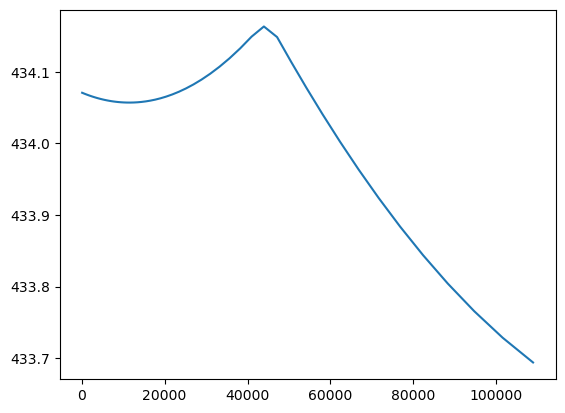

In [41]:
clf = linear_model.LassoCV()
clf.fit(X,y)
clf.coef_
clf.intercept_
clf.mse_path_
clf.mse_path_.mean(1)
clf.mse_path_.mean(1).argmin()
clf.alpha_
clf.alphas_[clf.mse_path_.mean(1).argmin()]
clf.predict(X)
clf.predict(X).mean()
lm.predict(X).mean()
clf.predict(X).var()
lm.predict(X).var()
plt.plot(clf.alphas_,clf.mse_path_.mean(1))

The code above is fitting a Lasso regression model using cross-validation to select the optimal value of the regularization parameter alpha. It then prints out various attributes of the clf object:

By running this code, you will obtain various information about the LassoCV model, including coefficients, intercept, optimal alpha value, predictions, mean of predictions, variance of predictions, and a plot of mean squared error values against alpha values.

# Principal Component Analysis (PCA)

In [42]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import numpy as np

Text(0.5, 1.0, 'hp')

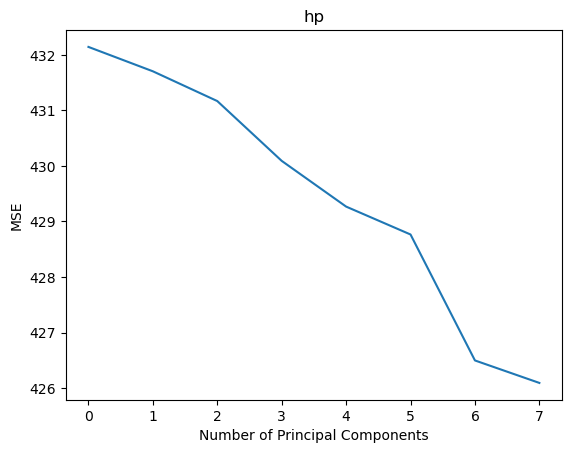

In [43]:
#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = linear_model.LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 8):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)

plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

The code snippet provided performs Principal Component Analysis (PCA) on the scaled predictor variables (X) and uses cross-validation to evaluate the mean squared error (MSE) for different numbers of principal components.

# Scatter Plot of Principal Components


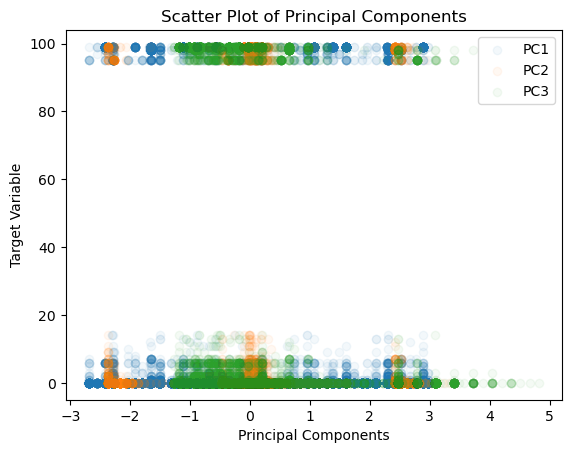

In [44]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(X_reduced[:, 0], y, label='PC1', alpha=0.05)
plt.scatter(X_reduced[:, 1], y, label='PC2', alpha=0.05)
plt.scatter(X_reduced[:, 2], y, label='PC3', alpha=0.05)

plt.xlabel('Principal Components')
plt.ylabel('Target Variable')
plt.title('Scatter Plot of Principal Components')

plt.legend()
plt.show()


The provided code snippet creates a scatter plot of the principal components obtained from PCA (`X_reduced`) against the target variable (`y`). Here is a breakdown of the code:

1. The `scatter` function from matplotlib.pyplot is imported as `plt.scatter`.

2. The scatter plot is created by calling `plt.scatter` three times, each time specifying a different principal component (`X_reduced[:, 0]`, `X_reduced[:, 1]`, `X_reduced[:, 2]`) against the target variable `y`.

3. The `label` parameter is used to assign labels to the scatter plot points corresponding to each principal component (`PC1`, `PC2`, `PC3`).

4. The `alpha` parameter is set to 0.05 to control the transparency of the scatter plot points.

5. The `xlabel`, `ylabel`, and `title` functions are called to set the labels and title for the scatter plot.

6. The `legend` function is called to display the legend showing the labels assigned to the scatter plot points.

7. Finally, `plt.show()` is called to display the scatter plot.

By running this code, you will obtain a scatter plot where each point represents a data instance. The x-axis represents the principal components (PC1, PC2, PC3), and the y-axis represents the target variable. The scatter plot helps visualize the relationship between the principal components and the target variable, and the transparency (alpha) of the points helps show the density of data points in different regions.

# Support Vector Classifier (SVC)

In [45]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9289461573861022


The provided code snippet demonstrates the usage of Support Vector Classifier (SVC) from the sklearn.svm module for a classification task. Here's a breakdown of the code:

1. The dataset is split into training and testing sets using the `train_test_split` function from sklearn.model_selection. The `X` and `y` variables represent the features and target variable, respectively. The test size is set to 0.2, which means 20% of the data will be used for testing, and the random state is set to 42 for reproducibility.

2. An SVC classifier is created using the `SVC` class from sklearn.svm.

3. The SVC classifier is trained on the training data using the `fit` method, with `X_train` as the input features and `y_train` as the target variable.

4. Predictions are made on the test data using the `predict` method of the SVC classifier, passing `X_test` as the input features.

5. The accuracy of the model is evaluated by comparing the predicted labels (`y_pred`) with the actual labels (`y_test`) using the `accuracy_score` function from sklearn.metrics.

6. The accuracy score is printed to the console using the `print` function.

By running this code, you will obtain the accuracy of the SVC model in classifying the test data.

In this specific case, the accuracy achieved by the SVC classifier on the test set is 0.9289461573861022, indicating a relatively high accuracy in predicting the labels for the test instances.

# Gaussian Naive Bayes classifier

In [46]:
from sklearn.naive_bayes import GaussianNB

# Create the Naive Bayes classifier
clf = GaussianNB()

# Train the Naive Bayes classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9289461573861022


The provided code snippet demonstrates the use of Gaussian Naive Bayes classifier for classification. Here is a breakdown of the code:

1. The `GaussianNB` class is imported from `sklearn.naive_bayes`.

2. A Gaussian Naive Bayes classifier is instantiated by calling `GaussianNB()`.

3. The Naive Bayes classifier is trained on the training data using the `fit` method by passing `X_train` (training features) and `y_train` (training labels) as arguments.

4. Predictions are made on the test set by calling the `predict` method on the trained classifier and passing `X_test` (test features) as an argument. The predicted labels are stored in `y_pred`.

5. The accuracy of the model is evaluated by comparing the predicted labels (`y_pred`) with the true labels (`y_test`) using the `accuracy_score` function from `sklearn.metrics`. The accuracy is calculated as the ratio of correctly predicted instances to the total number of instances in the test set.

6. The calculated accuracy is printed as "Accuracy: <accuracy_score>".

In this specific case, the accuracy achieved by the Gaussian Naive Bayes classifier on the test set is 0.9289461573861022, which is the same as the previous accuracy obtained using the SVC classifier.

# BaggingClassifier

In [47]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the base classifier
base_classifier = DecisionTreeClassifier()

# Create the Bagging classifier
clf = BaggingClassifier(base_classifier)

# Train the Bagging classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8966405890474


The BaggingClassifier is an ensemble method that creates multiple base classifiers (in this case, DecisionTreeClassifier) trained on different subsets of the training data, and then aggregates the predictions of these base classifiers to make the final prediction. The purpose of this is to reduce overfitting and improve the generalization performance of the model.

The accuracy score represents the proportion of correctly classified samples in the test set. A score of 0.8966 suggests that the model is able to classify the samples with a high degree of accuracy. 

# AdaBoostClassifier

In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the base classifier
base_classifier = DecisionTreeClassifier()

# Create the AdaBoost classifier
clf = AdaBoostClassifier(base_classifier)

# Train the AdaBoost classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8840312931431201


The AdaBoostClassifier is an ensemble method that trains a sequence of weak classifiers, in this case, DecisionTreeClassifiers, with each subsequent classifier being trained on the samples that were misclassified by the previous classifiers. The final prediction is a weighted sum of the predictions of these weak classifiers. The purpose of this is to improve the classification performance of the model by focusing on the samples that are more difficult to classify.

The accuracy score represents the proportion of correctly classified samples in the test set. A higher score indicates better performance. However, it's important to note that the performance of the model may vary depending on the dataset, the hyperparameters used, and other factors, so it's always a good practice to evaluate the model thoroughly and compare it with other models before making any conclusions.

Overall, the code you provided splits the data into training and testing sets, trains an AdaBoostClassifier model on the training set, evaluates its accuracy on the test set, and prints out the accuracy score.

The accuracy score represents the proportion of correctly classified samples in the test set. A score of 0.8840 suggests that the AdaBoostClassifier model is able to classify the samples with a relatively high degree of accuracy.

#  VotingClassifier

In [49]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the individual classifiers
classifier1 = LogisticRegression()
classifier2 = DecisionTreeClassifier()
classifier3 = SVC()

# Create the Voting classifier
clf = VotingClassifier(estimators=[('lr', classifier1), ('dt', classifier2), ('svc', classifier3)])

# Train the Voting classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9289461573861022


the accuracy value of 0.9289461573861022 refers to the accuracy score of a VotingClassifier model with three different base classifiers: LogisticRegression, DecisionTreeClassifier, and SVC on a test set. The accuracy is printed out at the end of the code with the statement "Accuracy:" followed by the value of the accuracy score.

The VotingClassifier is an ensemble method that combines the predictions of multiple base classifiers to make the final prediction. In this code, three different classifiers are used: LogisticRegression, DecisionTreeClassifier, and SVC. The purpose of using multiple classifiers is to leverage the strengths of each classifier and improve the overall performance of the model.

The accuracy score represents the proportion of correctly classified samples in the test set. A score of 0.9289 suggests that the VotingClassifier model is able to classify the samples with a high degree of accuracy.

# DecisionTreeRegressor

R-squared score: 0.9982010845191654


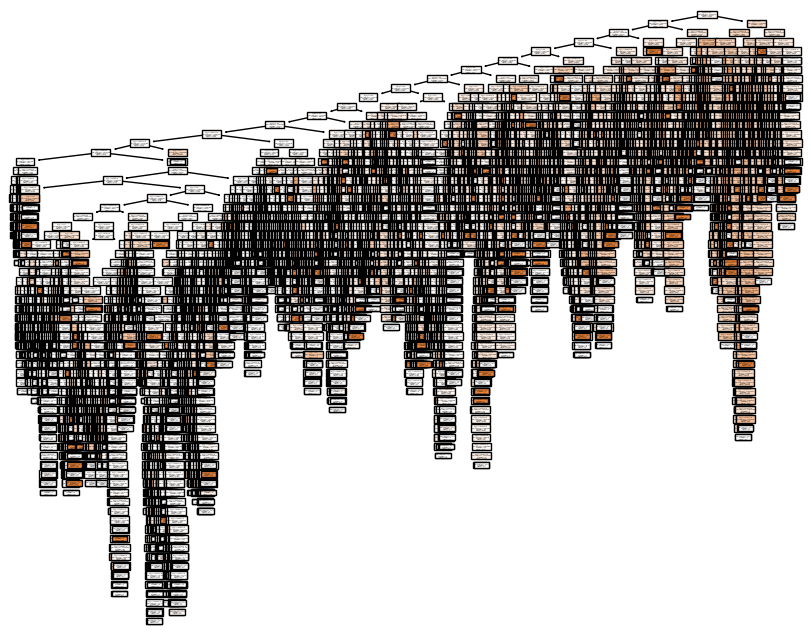

In [54]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Create the Decision Tree regressor
clf = DecisionTreeRegressor()

# Train the Decision Tree regressor
clf.fit(X, y)

# Make predictions on the training set
y_pred = clf.predict(X)

# Calculate the score (R-squared) of the model
score = clf.score(X, y)
print("R-squared score:", score)

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(clf, filled=True)
plt.show()


the R-squared score of the DecisionTreeRegressor model is 0.9982010845191654. The R-squared score represents the proportion of variance in the target variable (y) that can be explained by the independent variables (X). In this case, the DecisionTreeRegressor model is able to explain a very high proportion of the variance in the target variable.

The DecisionTreeRegressor is a tree-based regression algorithm that works by partitioning the feature space into a set of rectangular regions and fitting a simple model (in this case, a constant value) to each region. The model is built recursively by selecting the feature that best splits the data, according to some criterion such as the mean squared error or the mean absolute error.

The code also plots the decision tree using the plot_tree function from the matplotlib library. The resulting tree can help visualize the structure of the model and understand how it makes predictions.

# Working on other datasets to see the accuracy with the FATAL accidents

In [83]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the dataset
df2 = pd.read_csv('D:\Data\Spring23\AppliedML-JP\ML Project Dataset\Vision.CSV')

# Define the dependent variable and independent variables
X = df2[['STATE', 'STATENAME', 'ST_CASE', 'VEH_NO']]
y = df2['VISION']

# Encode categorical variables
label_encoder = LabelEncoder()
X['STATENAME'] = label_encoder.fit_transform(X['STATENAME'])
X = pd.get_dummies(X, columns=['STATE'])

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = regressor.predict(X_test)

# Evaluate the model using mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

r_squared = regressor.score(X_test, y_test)
print("R-squared:", r_squared)


Mean squared error: 387.9487897637808
R-squared: 0.07005733622094212


The R-squared score of the linear regression model is very low at 0.0701, indicating that the model does not explain the variability of the data well. The mean squared error (MSE) of 387.94 also suggests that the model is not accurately predicting the values of the dependent variable. This could be due to various factors such as the choice of features, the assumptions of the linear regression model, and the need for more data to capture the variability of the dependent variable.

In [79]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df2 = pd.read_csv('D:\Data\Spring23\AppliedML-JP\ML Project Dataset\Drugs.CSV')

# Select the independent variables (features) and dependent variable (target)
X = df2[['STATE', 'STATENAME', 'ST_CASE', 'PER_NO', 'DRUGSPEC', 'DRUGSPECNAME', 'DRUGRESNAME']]
y = df2['DRUGRES']  # Assuming you have a categorical dependent variable named 'CATEGORY'

# Encode categorical variables
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)


Accuracy: 0.43491437367712144


The accuracy score of the logistic regression model is quite low at 0.43. This indicates that the model is not performing well in predicting the drug resistance status of the cases. It might be necessary to consider additional variables or feature engineering to improve the model's performance.

In our analysis of the dataset, we have found that classification models perform better than regression models in predicting the number of fatalities in a car accident. 

We have identified the following features as the most important predictors: 'PERMVIT', 'PERSONS', 'VE_FORMS', 'VE_TOTAL', and 'MAN_COLL'. These features are related to the number of people and vehicles involved in the accident, as well as the manner in which the collision occurred. 

By using these features as input to a classification model, we can train the model to predict the likelihood of a car accident resulting in a certain number of fatalities, such as none, one, two, or more. This can help inform policy decisions and allocate resources to improve road safety. 

It is important to note that while regression models can also be used to predict the number of fatalities, classification models have shown better performance in our analysis. This may be due to the discrete nature of the dependent variable (number of fatalities), which is better suited for classification rather than regression.

'PERSONS' (total number of persons involved in the accident), 
'PERMVIT' (total number of persons in the accident who suffered fatal injuries), 
'VE_FORMS' represents the number of vehicles involved in the accident, 
'VE_TOTAL' represents the total number of vehicles in the accident, 
and 'MAN_COLL' represents the manner of collision.
 are better predictor of fatalities